# Personalized User-level DP

In [10]:
import numpy as np

import os
path_project = os.path.dirname(os.path.abspath('.'))
import sys
sys.path.append(os.path.join(path_project, 'src'))
sys.path.append(os.path.join(path_project, 'exp/script'))

img_path = os.path.join(path_project, 'exp', 'img')
pickle_path = os.path.join(path_project, 'exp', 'pickle')
results_path = os.path.join(path_project, 'exp', 'results')

from personalized_utils import (
    make_q_c_curve, plot_q_c_curve, 
    make_epsilon_u, group_by_closest_below,
    static_optimization, show_static_optimization_result,
    prepare_grid_search,
    run_online_optimization, show_online_optimization_result,
    run_with_specified_idx, show_specified_idx_result,
)
from mylogger import logger_set_warning, logger_set_info, logger_set_debug


# Observation
Given following parameters, the q C pair satisfying the privacy constraint has many candidates
- epsilon_u
- delta
- n_round
- sigma


Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/q_c_pair-example.png


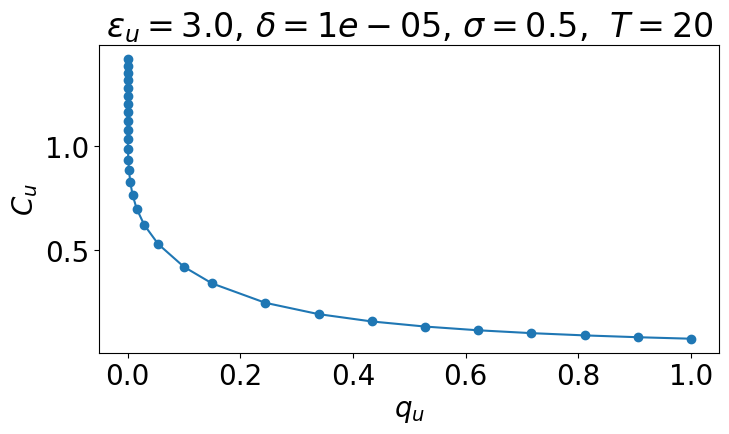

In [2]:
# Figure of q_c_pair.png
epsilon_u = 3.0
n_round = 20
delta = 1e-5
sigma = 0.5
x, y = make_q_c_curve(epsilon_u=epsilon_u, delta=delta, sigma=sigma, num_points=30, n_round=n_round, min=-6)
plot_q_c_curve(
    x, y,
    title=r"$\epsilon_u={}$, $\delta={}$, $\sigma={}$,  $T={}$".format(
                epsilon_u, delta, sigma, n_round,
            )
)

# PULDP-AVG

## Offline HPO

### HeartDisease dataset

#### Test with all of HPs for showing group-independency (Figure in Appendix)

Basic setting 

(This setup is close to the real world, and each group has a different number of users and different privacy budgets, so the optimal HP is likely to be different.)

- (eps1, eps2, eps3) = (0.15, 3.0, 5.0)
- with ratio (eps1, eps2, eps3) = (0.6, 0.25, 0.15)

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group0-heart_disease-users-400.png


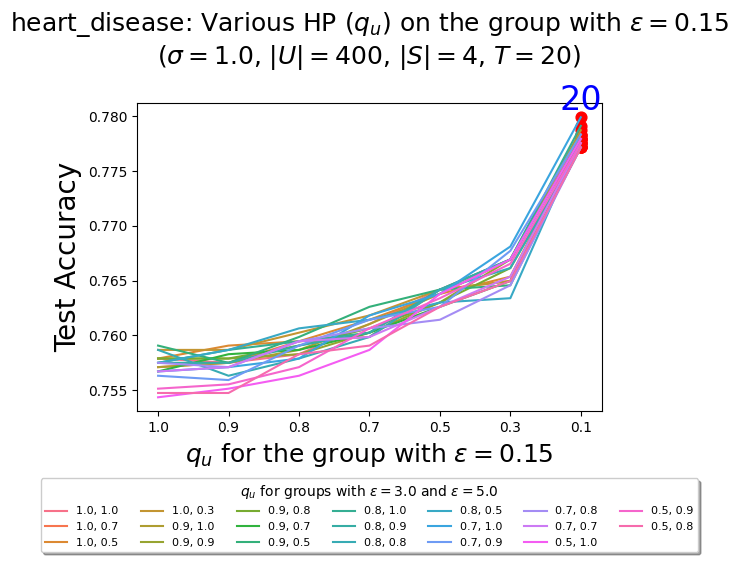

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group1-heart_disease-users-400.png


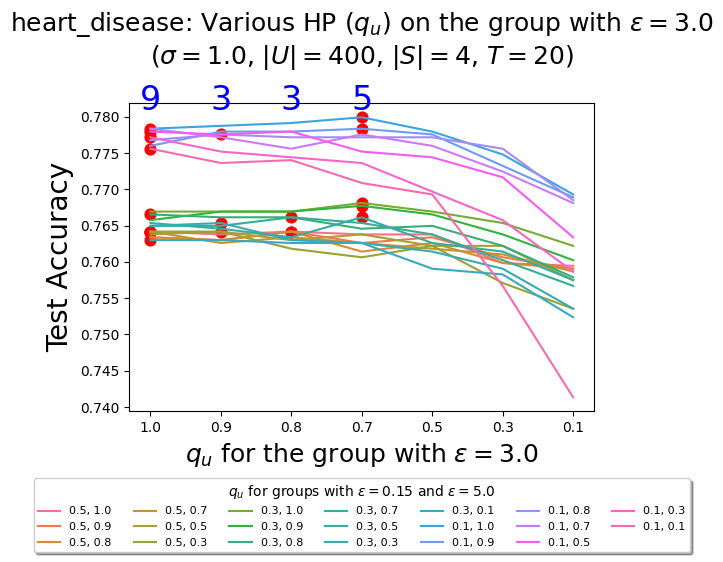

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group2-heart_disease-users-400.png


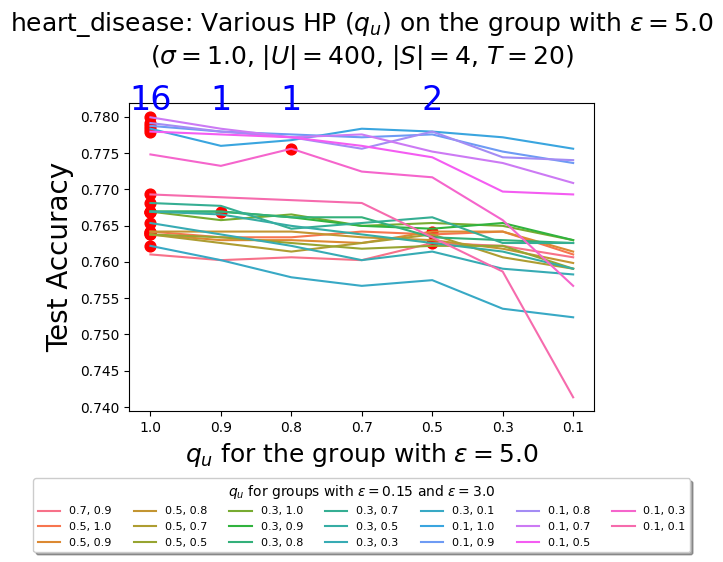

min_idx = {0.15: 6, 3.0: 0, 5.0: 0}, min_loss = 0.4785515457391739


In [2]:
sigma = 1.0
n_users = 400
epsilon_list = [0.15, 3.0, 5.0]
group_thresholds = epsilon_list
ratio_list = [0.6, 0.25, 0.15]
delta = 1e-5
n_round = 20
dataset_name = 'heart_disease'
q_step_size = 0.7
times = 10
validation_ratio = 0.0
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1]

random_state = np.random.RandomState(0)
epsilon_u = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
opt_strategy = prepare_grid_search(epsilon_u, start_idx=0, end_idx=7)

logger_set_warning()
static_optimization(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, times, 
    q_step_size, opt_strategy=opt_strategy, global_learning_rate=10.0, 
    local_learning_rate=0.001, local_epochs=30, validation_ratio=validation_ratio, 
    user_dist="uniform-iid", silo_dist="uniform", 
    static_q_u_list=static_q_u_list
)
min_idx, min_loss = show_static_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, 
    q_step_size, n_silos=4, opt_strategy=opt_strategy, validation_ratio=validation_ratio,
    train_loss=False, img_name=f"heart_disease-users-{n_users}", is_3d=True, 
    static_q_u_list=static_q_u_list
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

#### Various n_users with a single eps group (Fig in Sec4)

IDX:  {0.5: 0}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 1}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 2}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 3}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 4}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 5}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 6}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 7}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======

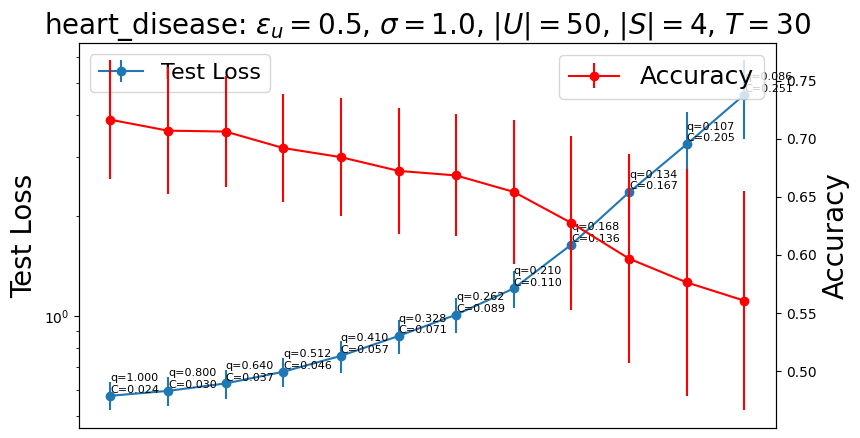

{0.5: 0} 0.5754557847976685
IDX:  {0.5: 0}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 1}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 2}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 3}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 4}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 5}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 6}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 7}
======== TIME: 0 start
======== TIME: 1 start
=

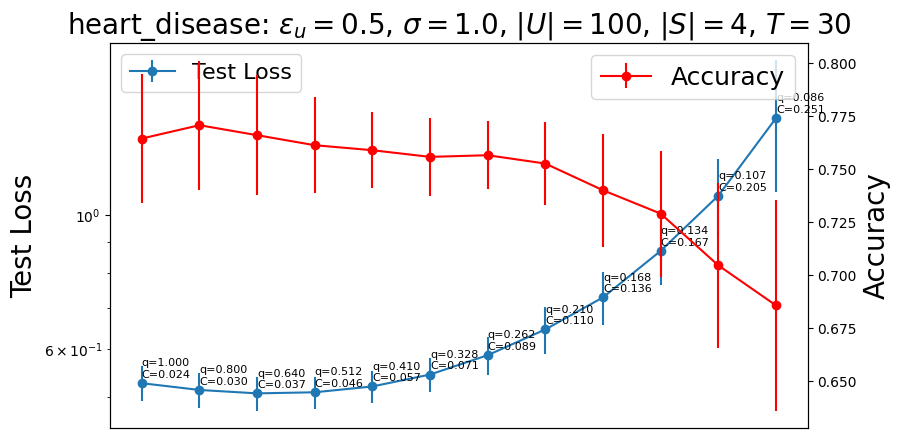

{0.5: 2} 0.5067352712154388
IDX:  {0.5: 0}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 1}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 2}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 3}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 4}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 5}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 6}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 7}
======== TIME: 0 start
======== TIME: 1 start
=

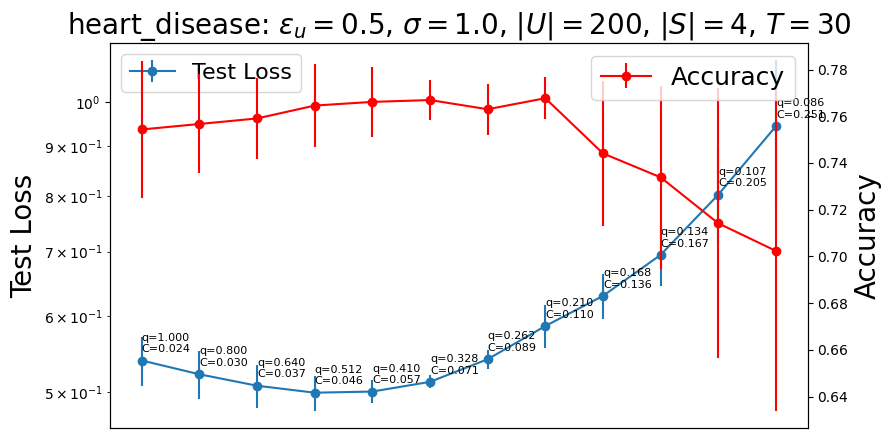

{0.5: 3} 0.49971715211868284
IDX:  {0.5: 0}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 1}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 2}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 3}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 4}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 5}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 6}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 7}
======== TIME: 0 start
======== TIME: 1 start


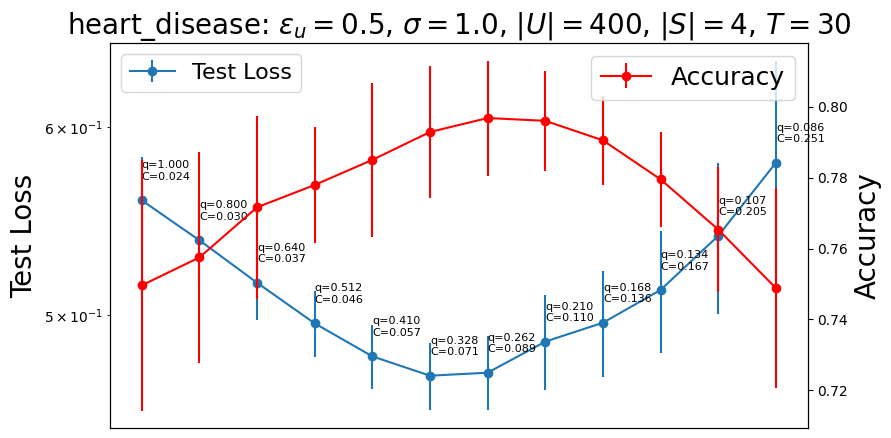

{0.5: 5} 0.4715245306491852


In [2]:
sigma = 1.0
epsilon_list = [0.5]
group_thresholds = [0.5]
ratio_list = [1.0]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
times = 5
validation_ratio = 0.0

for n_users in [50, 100, 200, 400]:
    random_state = np.random.RandomState(0)
    epsilon_u = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
    grouped = group_by_closest_below(epsilon_u_dct=epsilon_u, group_thresholds=group_thresholds)
    epsilon_u = {}
    for eps_u, user_ids in grouped.items():
        for user_id in user_ids:
            epsilon_u[user_id] = eps_u
    opt_strategy = prepare_grid_search(epsilon_u, start_idx=0, end_idx=12)

    logger_set_warning()
    static_optimization(
        epsilon_u, sigma, delta, n_users, n_round, dataset_name, times, 
        q_step_size, opt_strategy=opt_strategy, global_learning_rate=10.0, 
        local_learning_rate=0.001, local_epochs=30, 
        validation_ratio=validation_ratio, user_dist="uniform-iid", silo_dist="uniform",
    )
    min_idx, min_loss = show_static_optimization_result(
        epsilon_u, sigma, delta, n_users, n_round, dataset_name, 
        q_step_size, n_silos=4, opt_strategy=opt_strategy, 
        validation_ratio=validation_ratio, train_loss=False, user_dist="uniform-iid",
        img_name=f"heart_disease-uniform-users-{n_users}"
    )
    print(min_idx, min_loss)

#### Various eps_u with a single eps group (Fig in Sec4)

IDX:  {0.5: 0}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 1}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 2}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 3}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 4}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 5}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 6}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {0.5: 7}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======

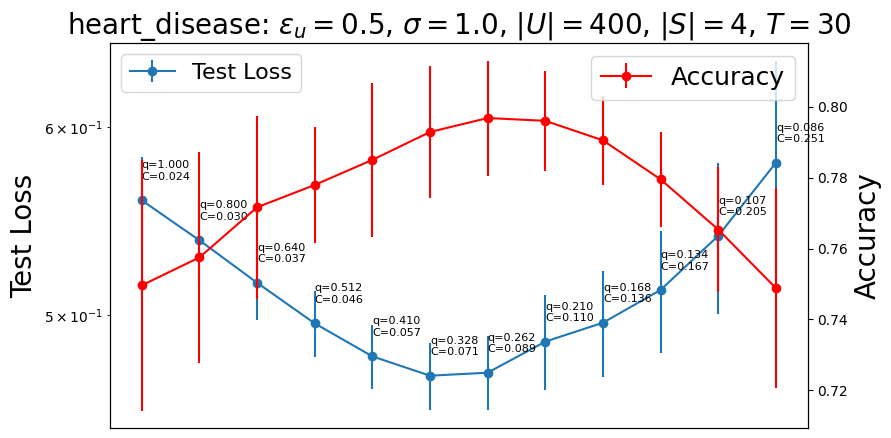

{0.5: 5} 0.4715245306491852
IDX:  {1.0: 0}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {1.0: 1}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {1.0: 2}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {1.0: 3}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {1.0: 4}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {1.0: 5}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {1.0: 6}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {1.0: 7}
======== TIME: 0 start
======== TIME: 1 start
=

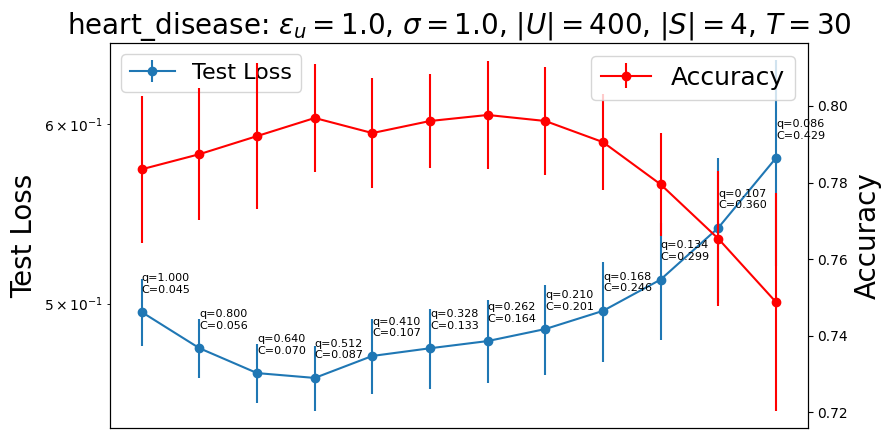

{1.0: 3} 0.46370276212692263
IDX:  {5.0: 0}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {5.0: 1}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {5.0: 2}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {5.0: 3}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {5.0: 4}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {5.0: 5}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {5.0: 6}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {5.0: 7}
======== TIME: 0 start
======== TIME: 1 start


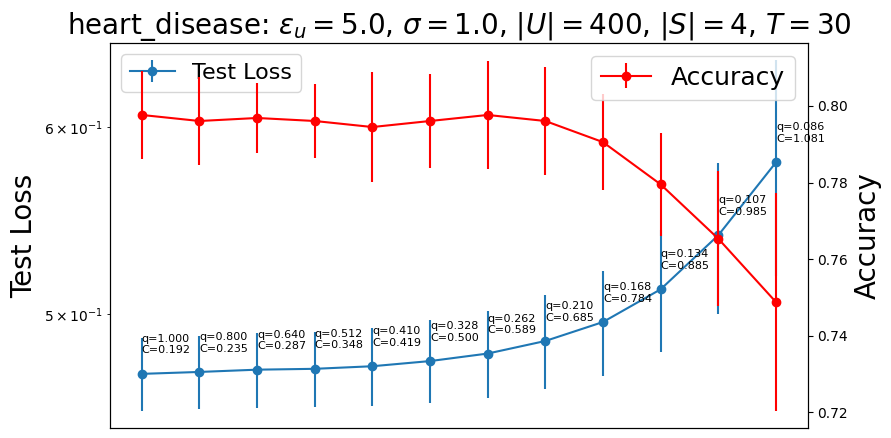

{5.0: 0} 0.4719789981842041


In [3]:
sigma = 1.0
ratio_list = [1.0]
delta = 1e-5
n_round = 30
n_users = 400
dataset_name = 'heart_disease'
q_step_size = 0.8
times = 5
validation_ratio = 0.0

for eps_u in [0.5, 1.0, 5.0]:
    epsilon_list = [eps_u]
    group_thresholds = [eps_u]
    random_state = np.random.RandomState(0)
    epsilon_u = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
    grouped = group_by_closest_below(epsilon_u_dct=epsilon_u, group_thresholds=group_thresholds)
    epsilon_u = {}
    for eps_u, user_ids in grouped.items():
        for user_id in user_ids:
            epsilon_u[user_id] = eps_u
    opt_strategy = prepare_grid_search(epsilon_u, start_idx=0, end_idx=12)

    logger_set_warning()
    static_optimization(
        epsilon_u, sigma, delta, n_users, n_round, dataset_name, times, 
        q_step_size, opt_strategy=opt_strategy, global_learning_rate=10.0, 
        local_learning_rate=0.001, local_epochs=30, 
        validation_ratio=validation_ratio, user_dist="uniform-iid", silo_dist="uniform",
    )
    min_idx, min_loss = show_static_optimization_result(
        epsilon_u, sigma, delta, n_users, n_round, dataset_name, 
        q_step_size, n_silos=4, opt_strategy=opt_strategy, validation_ratio=validation_ratio,
        train_loss=False, img_name=f"heart_disease-uniform-eps-{epsilon_list[0]}", user_dist="uniform-iid",
    )
    print(min_idx, min_loss)

#### for ULDP-AVG

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uldpavg.png


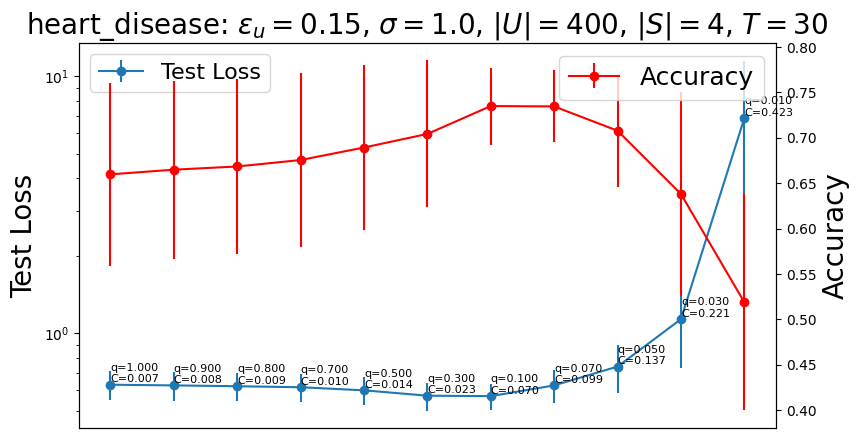

min_idx = {0.15: 6}, min_loss = 0.5696709662675857


In [11]:
sigma = 1.0
n_users = 400
epsilon_list = [0.15]
group_thresholds = epsilon_list
ratio_list = [1.0]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.0
times = 10
validation_ratio = 0.0
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1, 0.07, 0.05, 0.03, 0.01]

random_state = np.random.RandomState(0)
epsilon_u = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
opt_strategy = prepare_grid_search(epsilon_u, start_idx=7, end_idx=11)

logger_set_warning()
static_optimization(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, times, 
    q_step_size, opt_strategy=opt_strategy, global_learning_rate=10.0, 
    local_learning_rate=0.001, local_epochs=30, validation_ratio=validation_ratio, 
    user_dist="uniform-iid", silo_dist="uniform", 
    static_q_u_list=static_q_u_list
)
min_idx, min_loss = show_static_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, 
    q_step_size, n_silos=4, opt_strategy=opt_strategy, validation_ratio=validation_ratio,
    train_loss=False, img_name=f"{dataset_name}-uldpavg", is_3d=False, 
    static_q_u_list=static_q_u_list
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

### BodyPerformance dataset

##### 16 candidates

IDX:  {3.0: 0}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {3.0: 1}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {3.0: 2}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {3.0: 3}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {3.0: 4}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {3.0: 5}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {3.0: 6}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
IDX:  {3.0: 7}
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======

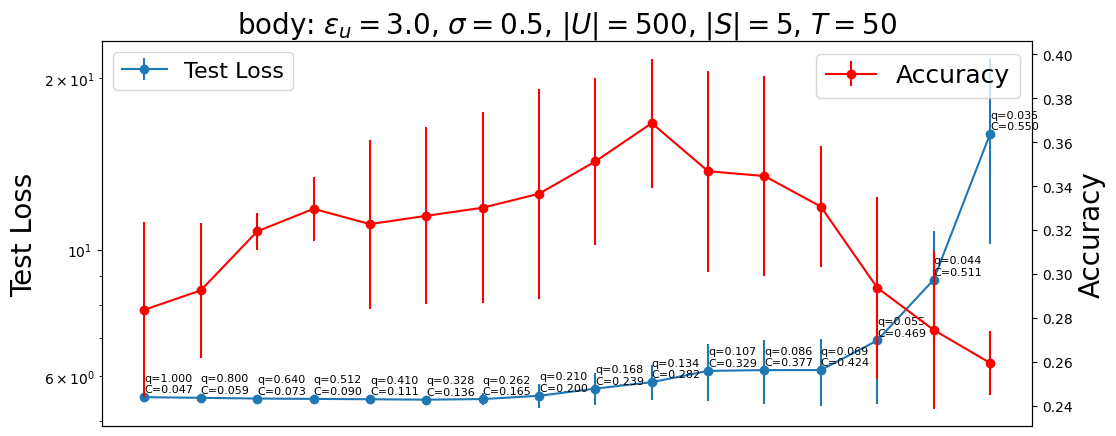

{3.0: 5} 5.45396101474762


In [4]:
sigma = 0.5
epsilon_list = [3.0]
group_thresholds = [3.0]
ratio_list = [1.0]
delta = 1e-5
n_users = 500
n_round = 50
dataset_name = 'body'
q_step_size = 0.8
times = 5
validation_ratio = 0.0
n_users = 500

random_state = np.random.RandomState(0)
epsilon_u = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
opt_strategy = prepare_grid_search(epsilon_u, start_idx=0, end_idx=16)

logger_set_warning()
static_optimization(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, times, 
    q_step_size, opt_strategy=opt_strategy, global_learning_rate=5.0, 
    local_learning_rate=0.001, local_epochs=30, 
    validation_ratio=validation_ratio, user_dist="uniform-iid", silo_dist="uniform"
)
min_idx, min_loss = show_static_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, 
    q_step_size, n_silos=5, opt_strategy=opt_strategy, user_dist="uniform-iid",
    validation_ratio=validation_ratio, train_loss=False, img_name=f"{dataset_name}-uniform"
)
print(min_idx, min_loss)

#### Various n_users with a single eps group (Fig in Sec4)

#### Various eps_u with a single eps group (Fig in Sec4)

### MNIST dataset

In [16]:
sigma = 1.0
epsilon_list = [3.0]
group_thresholds = [3.0]
ratio_list = [1.0]
delta = 1e-5
n_round = 30
dataset_name = 'mnist'
q_step_size = 0.5
times = 1
validation_ratio = 0.0

for n_users in [100]:
    random_state = np.random.RandomState(0)
    epsilon_u = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
    grouped = group_by_closest_below(epsilon_u_dct=epsilon_u, group_thresholds=group_thresholds)
    epsilon_u = {}
    for eps_u, user_ids in grouped.items():
        for user_id in user_ids:
            epsilon_u[user_id] = eps_u
    opt_strategy = prepare_grid_search(epsilon_u, start_idx=0, end_idx=1)

    logger_set_info()
    static_optimization(
        epsilon_u, sigma, delta, n_users, n_round, dataset_name, times, 
        q_step_size, opt_strategy=opt_strategy, global_learning_rate=10.0, 
        local_learning_rate=0.001, local_epochs=50,
        validation_ratio=validation_ratio, user_dist="uniform-iid", silo_dist="uniform",
    )
    min_idx, min_loss = show_static_optimization_result(
        epsilon_u, sigma, delta, n_users, n_round, dataset_name, 
        q_step_size, n_silos=4, opt_strategy=opt_strategy, 
        validation_ratio=validation_ratio, train_loss=False, user_dist="uniform-iid",
        img_name=f"{dataset_name}-uniform-users-{n_users}"
    )
    print(min_idx, min_loss)

IDX:  {3.0: 0}
======== TIME: 0 start
[15:35:42 INFO] Start federated learning simulation
[15:46:56 INFO] |----- Global test result of round 0
[15:46:56 INFO] 	 |----- Test/Acc: 0.0985 (10000), Test/Loss: 45.617130517959595
[15:46:56 INFO] 

========== end 0-th round training ===========



## Online HPO

### HeartDisease

In [2]:
all_acc_results = {}

#### QCTest

##### initial_q_u = 1.0

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-1.0.png


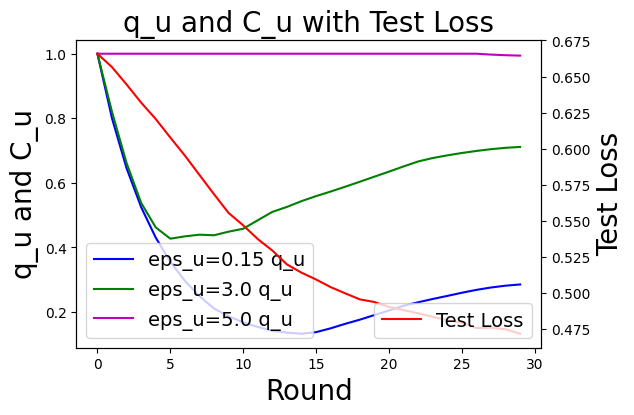

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-1.0.png


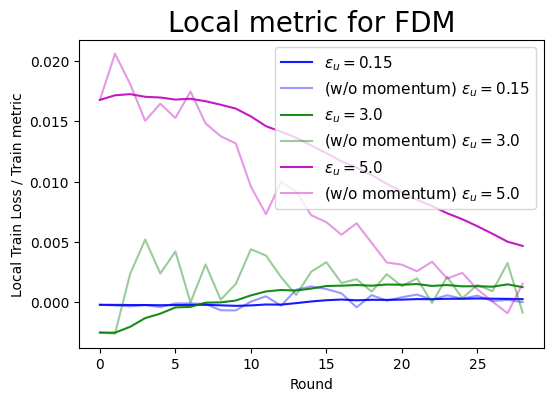

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-testacc-heart_disease-PULDP-AVG-QCTest-1.0.png


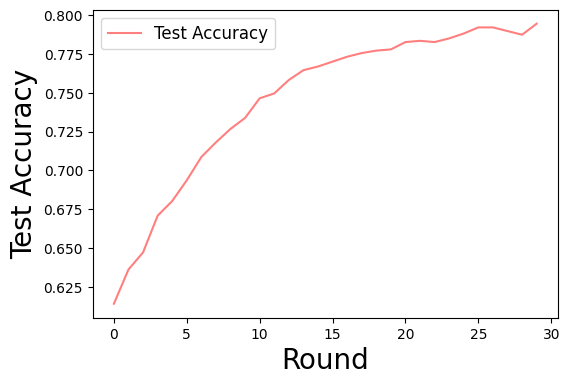

In [3]:
n_users = 400
sigma = 1.0
epsilon_list = [0.15, 3.0, 5.0]
group_thresholds = epsilon_list
ratio_list = [0.6, 0.25, 0.15]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
initial_q_u = 1.0
validation_ratio = 0.5
times = 10
random_state = np.random.RandomState(0)
agg_strategy = "PULDP-AVG-QCTest"
with_momentum = True
step_decay = True
hp_baseline = None

logger_set_warning()

epsilon_u_dct = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u_dct, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
# run_online_optimization(
#     epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
#     group_thresholds, times, global_learning_rate=10.0, local_learning_rate=0.001, 
#     local_epochs=30, validation_ratio=validation_ratio, agg_strategy=agg_strategy, 
#     with_momentum=with_momentum, step_decay=step_decay, hp_baseline=hp_baseline,
#     user_dist="uniform-iid", silo_dist="uniform", initial_q_u=initial_q_u,
# )
x, acc_means, acc_stds = show_online_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
    validation_ratio=validation_ratio, agg_strategy=agg_strategy, with_momentum=with_momentum,  initial_q_u=initial_q_u,
    step_decay=step_decay, hp_baseline=hp_baseline, errorbar=False, img_name=f"{dataset_name}-{agg_strategy}-{initial_q_u}")

all_acc_results[(agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)

##### initial_q_u = 0.5

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.5.png


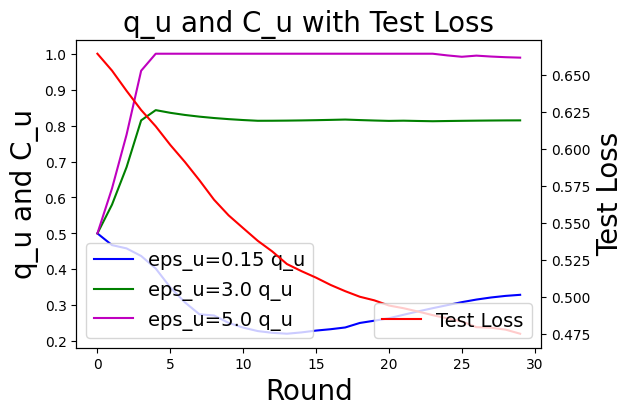

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.5.png


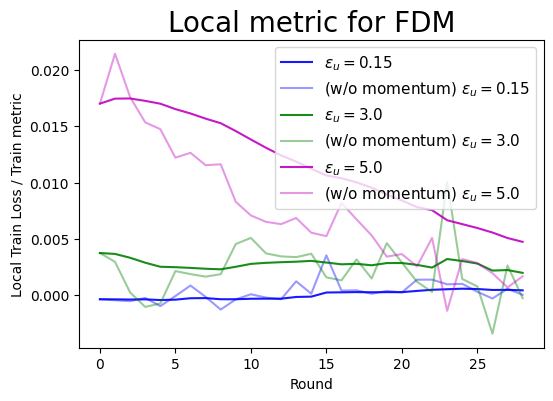

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-testacc-heart_disease-PULDP-AVG-QCTest-0.5.png


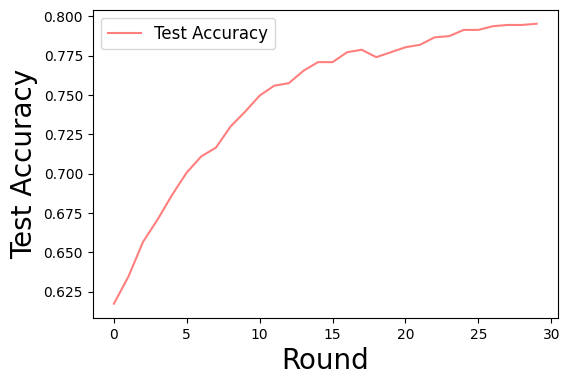

In [5]:
n_users = 400
sigma = 1.0
epsilon_list = [0.15, 3.0, 5.0]
group_thresholds = epsilon_list
ratio_list = [0.6, 0.25, 0.15]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
initial_q_u = 0.5
validation_ratio = 0.5
times = 10
random_state = np.random.RandomState(0)
agg_strategy = "PULDP-AVG-QCTest"
with_momentum = True
step_decay = True
hp_baseline = None

logger_set_warning()

epsilon_u_dct = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u_dct, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
# run_online_optimization(
#     epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
#     group_thresholds, times, global_learning_rate=10.0, local_learning_rate=0.001, 
#     local_epochs=30, validation_ratio=validation_ratio, agg_strategy=agg_strategy, 
#     with_momentum=with_momentum, step_decay=step_decay, hp_baseline=hp_baseline,
#     user_dist="uniform-iid", silo_dist="uniform", initial_q_u=initial_q_u,
# )
x, acc_means, acc_stds = show_online_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
    validation_ratio=validation_ratio, agg_strategy=agg_strategy, with_momentum=with_momentum, initial_q_u=initial_q_u,
    step_decay=step_decay, hp_baseline=hp_baseline, errorbar=False, img_name=f"{dataset_name}-{agg_strategy}-{initial_q_u}")
all_acc_results[(agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)

#### QCTrain

##### initial q_u=1.0

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-1.0.png


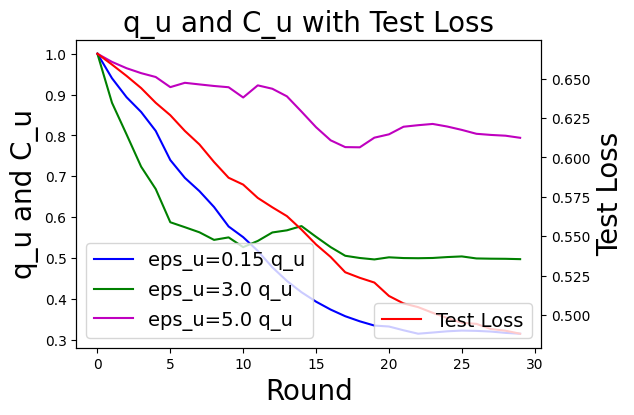

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-1.0.png


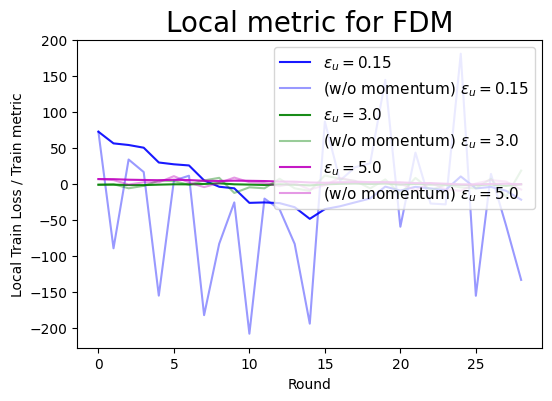

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-testacc-heart_disease-PULDP-AVG-QCTrain-1.0.png


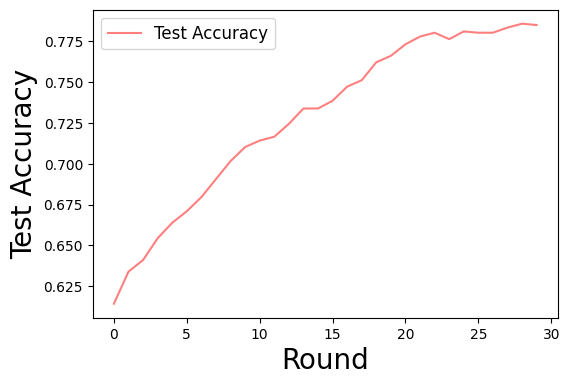

In [6]:
n_users = 400
sigma = 1.0
epsilon_list = [0.15, 3.0, 5.0]
group_thresholds = epsilon_list
ratio_list = [0.6, 0.25, 0.15]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
initial_q_u = 1.0
validation_ratio = 0.5
times = 10
random_state = np.random.RandomState(0)
agg_strategy = "PULDP-AVG-QCTrain"
with_momentum = True
step_decay = True
hp_baseline = None

logger_set_warning()

epsilon_u_dct = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u_dct, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
# run_online_optimization(
#     epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
#     group_thresholds, times, global_learning_rate=10.0, local_learning_rate=0.001, 
#     local_epochs=30, validation_ratio=validation_ratio, agg_strategy=agg_strategy, 
#     with_momentum=with_momentum, step_decay=step_decay, hp_baseline=hp_baseline,
#     user_dist="uniform-iid", silo_dist="uniform", initial_q_u=initial_q_u,
# )
x, acc_means, acc_stds = show_online_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
    validation_ratio=validation_ratio, agg_strategy=agg_strategy, with_momentum=with_momentum, initial_q_u=initial_q_u,
    step_decay=step_decay, hp_baseline=hp_baseline, errorbar=False, img_name=f"{dataset_name}-{agg_strategy}-{initial_q_u}")
all_acc_results[(agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)

##### initial q_u=0.5

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.5.png


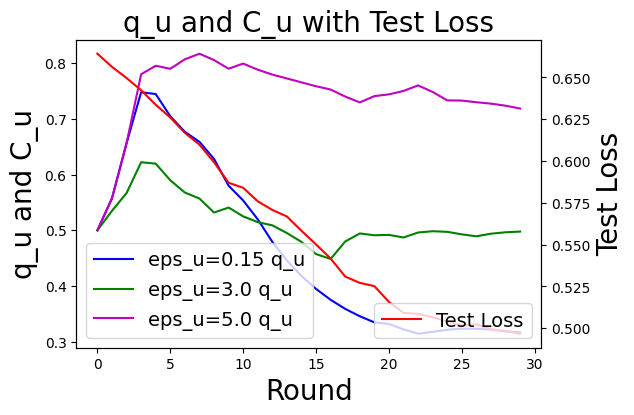

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.5.png


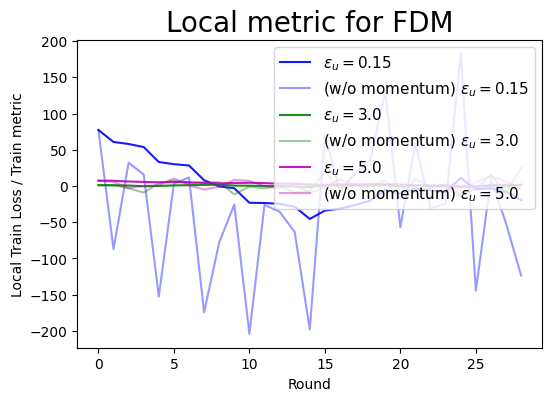

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-testacc-heart_disease-PULDP-AVG-QCTrain-0.5.png


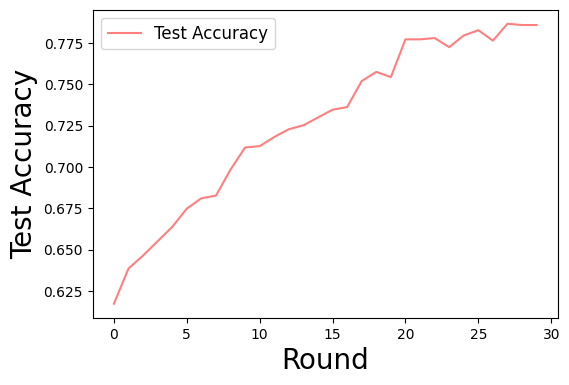

In [8]:
n_users = 400
sigma = 1.0
epsilon_list = [0.15, 3.0, 5.0]
group_thresholds = epsilon_list
ratio_list = [0.6, 0.25, 0.15]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
initial_q_u = 0.5
validation_ratio = 0.5
times = 10
random_state = np.random.RandomState(0)
agg_strategy = "PULDP-AVG-QCTrain"
with_momentum = True
step_decay = True
hp_baseline = None

logger_set_warning()

epsilon_u_dct = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u_dct, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
# run_online_optimization(
#     epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
#     group_thresholds, times, global_learning_rate=10.0, local_learning_rate=0.001, 
#     local_epochs=30, validation_ratio=validation_ratio, agg_strategy=agg_strategy, 
#     with_momentum=with_momentum, step_decay=step_decay, hp_baseline=hp_baseline,
#     user_dist="uniform-iid", silo_dist="uniform", initial_q_u=initial_q_u,
# )
x, acc_means, acc_stds = show_online_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
    validation_ratio=validation_ratio, agg_strategy=agg_strategy, with_momentum=with_momentum, initial_q_u=initial_q_u,
    step_decay=step_decay, hp_baseline=hp_baseline, errorbar=False, img_name=f"{dataset_name}-{agg_strategy}-{initial_q_u}")
all_acc_results[(agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)

#### Baselines

##### Best HP by static optimization (PULDP-AVG)
$(\epsilon_1, \epsilon_2, \epsilon_3) => (q_u=0.1, q_u=0.7, q_u=1.0)$

02/01/2024 21:16:37:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-heart_disease-PULDPAVG.png


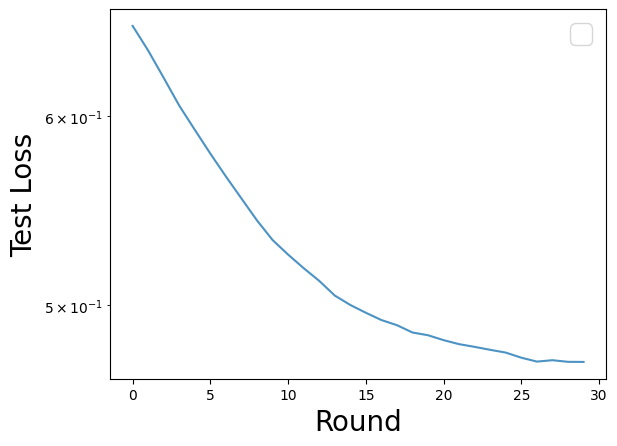

In [8]:
n_users = 400
sigma = 1.0
epsilon_list = [0.15, 3.0, 5.0]
group_thresholds = epsilon_list
ratio_list = [0.6, 0.25, 0.15]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
validation_ratio = 0.0
times = 10
random_state = np.random.RandomState(0)
agg_strategy = "PULDP-AVG"
with_momentum = True
step_decay = True
hp_baseline = None
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1]

logger_set_warning()

idx_per_group = {0.15: 6, 3.0: 3, 5.0: 0}
epsilon_u_dct = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u_dct, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
prefix_epsilon_u = list(epsilon_u.items())[:4]

run_with_specified_idx(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, times, 
    static_q_u_list=static_q_u_list, user_dist="uniform-iid", silo_dist="uniform", validation_ratio=validation_ratio,
    idx_per_group=idx_per_group, global_learning_rate=10.0, local_learning_rate=0.001, local_epochs=30)
x, acc_means, acc_stds = show_specified_idx_result(prefix_epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size,
    idx_per_group, validation_ratio=validation_ratio, img_name=f"{dataset_name}-PULDPAVG", errorbar=False, static_q_u_list=static_q_u_list)
all_acc_results[(agg_strategy, "PULDPAVG")] = (x, acc_means, acc_stds)

##### random updown

In [ ]:
n_users = 400
sigma = 1.0
epsilon_list = [0.15, 3.0, 5.0]
group_thresholds = epsilon_list
ratio_list = [0.6, 0.25, 0.15]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
initial_q_u = 0.5
validation_ratio = 0.5
times = 10
random_state = np.random.RandomState(0)
agg_strategy = "PULDP-AVG-QCTrain"
with_momentum = True
step_decay = True
hp_baseline = "random-updown"

logger_set_warning()

epsilon_u_dct = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u_dct, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
run_online_optimization(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
    group_thresholds, times, global_learning_rate=10.0, local_learning_rate=0.001, 
    local_epochs=30, validation_ratio=validation_ratio, agg_strategy=agg_strategy, 
    with_momentum=with_momentum, step_decay=step_decay, hp_baseline=hp_baseline,
    user_dist="uniform-iid", silo_dist="uniform", initial_q_u=initial_q_u,
)
x, acc_means, acc_stds = show_online_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
    validation_ratio=validation_ratio, agg_strategy=agg_strategy, with_momentum=with_momentum, initial_q_u=initial_q_u,
    step_decay=step_decay, hp_baseline=hp_baseline, errorbar=False, img_name=f"{dataset_name}-{agg_strategy}-{initial_q_u}-{hp_baseline}")
all_acc_results[(hp_baseline, initial_q_u)] = (x, acc_means, acc_stds)

##### random

In [ ]:
n_users = 400
sigma = 1.0
epsilon_list = [0.15, 3.0, 5.0]
group_thresholds = epsilon_list
ratio_list = [0.6, 0.25, 0.15]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
initial_q_u = 0.5
validation_ratio = 0.5
times = 10
random_state = np.random.RandomState(0)
agg_strategy = "PULDP-AVG-QCTrain"
with_momentum = True
step_decay = True
hp_baseline = "random"

logger_set_warning()

epsilon_u_dct = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u_dct, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
run_online_optimization(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
    group_thresholds, times, global_learning_rate=10.0, local_learning_rate=0.001, 
    local_epochs=30, validation_ratio=validation_ratio, agg_strategy=agg_strategy, 
    with_momentum=with_momentum, step_decay=step_decay, hp_baseline=hp_baseline,
    user_dist="uniform-iid", silo_dist="uniform", initial_q_u=initial_q_u,
)
x, acc_means, acc_stds = show_online_optimization_result(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, 
    validation_ratio=validation_ratio, agg_strategy=agg_strategy, with_momentum=with_momentum, initial_q_u=initial_q_u,
    step_decay=step_decay, hp_baseline=hp_baseline, errorbar=False, img_name=f"{dataset_name}-{agg_strategy}-{initial_q_u}-{hp_baseline}")
all_acc_results[(hp_baseline, initial_q_u)] = (x, acc_means, acc_stds)

##### ULDP-AVG

======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
======== TIME: 5 start
======== TIME: 6 start
======== TIME: 7 start
======== TIME: 8 start
======== TIME: 9 start


02/01/2024 21:18:45:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TEST ACC: 0.7350 ± 0.0424 , TEST LOSS: 0.5697 ± 0.0664
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-heart_disease-ULDPAVG.png


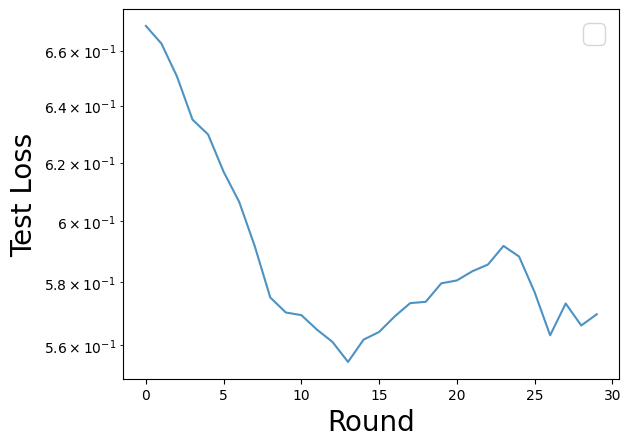

In [11]:
n_users = 400
sigma = 1.0
epsilon_list = [0.15]
group_thresholds = epsilon_list
ratio_list = [1.0]
delta = 1e-5
n_round = 30
dataset_name = 'heart_disease'
q_step_size = 0.8
validation_ratio = 0.0
times = 10
random_state = np.random.RandomState(0)
agg_strategy = "PULDP-AVG"
with_momentum = True
step_decay = True
hp_baseline = None
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1]

logger_set_warning()

idx_per_group = {0.15: 6}
epsilon_u_dct = make_epsilon_u(n_users=n_users, dist="hetero", epsilon_list=epsilon_list, ratio_list=ratio_list, random_state=random_state)
grouped = group_by_closest_below(epsilon_u_dct=epsilon_u_dct, group_thresholds=group_thresholds)
epsilon_u = {}
for eps_u, user_ids in grouped.items():
    for user_id in user_ids:
        epsilon_u[user_id] = eps_u
prefix_epsilon_u = list(epsilon_u.items())[:4]

run_with_specified_idx(
    epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size, times, 
    static_q_u_list=static_q_u_list, user_dist="uniform-iid", silo_dist="uniform", validation_ratio=validation_ratio,
    idx_per_group=idx_per_group, global_learning_rate=10.0, local_learning_rate=0.001, local_epochs=30)
x, acc_means, acc_stds = show_specified_idx_result(prefix_epsilon_u, sigma, delta, n_users, n_round, dataset_name, q_step_size,
    idx_per_group, validation_ratio=validation_ratio, img_name=f"{dataset_name}-ULDPAVG", errorbar=False, static_q_u_list=static_q_u_list)

all_acc_results[(agg_strategy, "ULDPAVG")] = (x, acc_means, acc_stds)